# *Exercises*

1. A friend finds a coin on the ground, flips it, and gets six heads in a row and then one tails. Give the beta distribution that describes this. Use integration to determine the probability that the true rate of flipping heads is between 0.4 and 0.6, reflectin that the coin is reasonably fair.

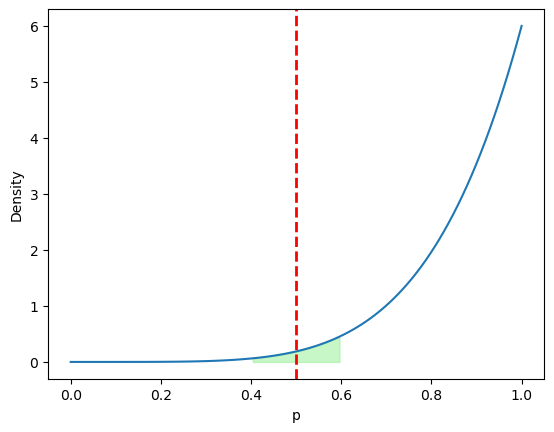

The P of the coin being fair (1/2 or 50% of either heads or tails) based of the observed events is: 4.26%, which makes it unfair


In [21]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

heads = 6
tails = 1

x = np.linspace(0, 1, 100)
y = beta.pdf(x, 6, 1)

plt.plot(x, y)
plt.fill_between(x, y, where=(x >= 0.4) & (x <= 0.6),color='lightgreen', alpha=0.5, label='Shaded Area')
plt.axvline(0.5, color='red', linestyle='--', linewidth=2)
plt.ylabel('Density')
plt.xlabel('p')
plt.show()

print(f'The P of the coin being fair (1/2 or 50% of either heads or tails) based of the observed events is: {(beta.sf(0.40, heads, tails)-beta.sf(0.60, heads, tails))*100:.2f}%, which makes it unfair')


2. Come up with a prior probability that the coin is fair. Use a beta distribution such that there is at least a 95% chance that the true rate of flipping heads is between 0.4 and 0.6

In [24]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

heads = 6
tails = 1
i = 1
x = np.linspace(0, 1, 100)
while True:
    new_tails = tails + i
    new_heads = heads + i
    beta_distribution = beta.pdf(x, new_heads, new_tails)
    if beta.sf(0.4, new_heads, new_tails)-beta.sf(0.6, new_heads, new_tails) >= 0.95:
        print(f'alpha:{new_heads}, beta:{new_tails}, for added {i}')
        break
    i += 1 

alpha:60, beta:55, for added 54


3. Now see how many more heads (with no more tails) it would take to convince you that there is a reasonable chance that the coin is *not* fair. In this case, lets say that this means that our belief in the rate of the coin being between 0.4 and 0.6 drops below 0.5.

In [19]:
from scipy.stats import beta 
import numpy as np

alpha_ = 55
beta_ = 55
x = np.linspace(0, 1, 100)

i = 1
while True:
    alpha_ += 1
    beta.pdf(x, alpha_, beta_)
    if beta.sf(0.4, alpha_, beta_) - beta.sf(0.6, alpha_, beta_) <= 0.5:
        print(f'We need {i} more heads to make this coin unfair')
        break
    i +=1 

We need 28 more heads to make this coin unfair
